# Day 3: Data Cleaning & Preprocessing
**Objective:** Implement and understand simple & multiple linear regression.
**Tools:** Scikit-learn, Pandas, Matplotlib

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [7]:
df = pd.read_csv("../data/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
# Step 3: Explore & Preprocess Data
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad

In [12]:
#Split data into train-test sets.

x = df[['area']] 
y = df['price'] 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [14]:
#Fit a Linear Regression model using sklearn.linear_model
model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [18]:
#Evaluate model using MAE, MSE, R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
R² Score: 0.27


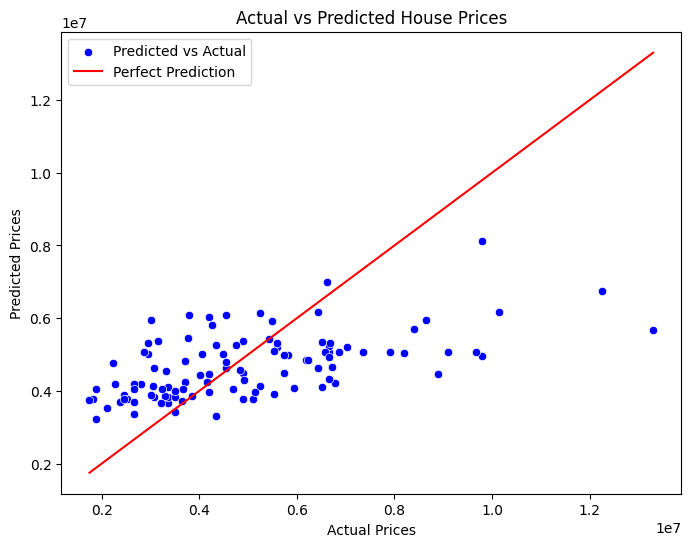


Model Coefficients:
Intercept: 2512254.2639593435
Coefficient: 425.72984193878284


In [21]:
#Plot regression line and interpret coefficients.
visualization_path = '../visualizations'
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.savefig(visualization_path+f'/plot_regression.png')
plt.show()
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")